<div class="alert alert-block alert-success">
<h4><center>Harshil Patel (pmb5br@virginia.edu) DS 5001 Spring 2023</center></h4>
</div>

<hr>

<div class="alert alert-block alert-info">
<h3><center> The Sun Also Rises, by Ernest Hemingway</center></h3>
</div>

<hr>

<div class="alert alert-block alert-warning">
<h4><center>Notebook 4: Content</center></h4> 
<ul>
  <li>Part of Speech (POS) Grouping</li>
  <li>Creating Annotated Token Table for Analysis</li>
  <li>Word Length and Entropy</li>
  <li>Zipf’s Law</li>
  <li>TFIDF
    <ul>
      <li>Computing TF Variants</li>
      <li>Document Frequency</li>
      <li>Computing BOW TFIDF</li>
      <li>Computing Vocabulary TFIDF_SUM</li>
    </ul>
  </li>
  <li>Visualizing the TFIDF Analysis</li>
  <li>Comparing Top Terms from Different Variants of TFIDF</li>
  <li>Identifying Significant Terms using TFIDF Analysis</li>
  <li>More Statistics</li>
</ul>
    
Tables saved - nltk_tokens_FINAL
    
</div>

<hr>

In [1]:
import pandas as pd
from nltk.tokenize import word_tokenize
import numpy as np
import plotly.express as px
import re
import seaborn as sns

In [2]:
from glob import glob
from numpy.linalg import norm
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import nltk
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as pla

In [3]:
TOKEN_NLTK_ANNOTATED = pd.read_csv(f"../data/output/tokens_nltk.csv", index_col=0)

In [4]:
TOKEN_NLTK_ANNOTATED

sent_num  token_num               pos_tuple  pos     token_str  \
chap_num                                                                   
1                0          0       ('Robert', 'NNP')  NNP        Robert   
1                0          1         ('Cohn', 'NNP')  NNP          Cohn   
1                0          2          ('was', 'VBD')  VBD           was   
1                0          3          ('once', 'RB')   RB          once   
1                0          4  ('middleweight', 'JJ')   JJ  middleweight   
...            ...        ...                     ...  ...           ...   
19               1          8            ('so', 'RB')   RB            so   
19               1          9              ('?', '.')    .             ?   
19               1         10             ('”', 'NN')   NN             ”   
19               0          0           ('THE', 'DT')   DT           THE   
19               0          1           ('END', 'NN')   NN           END   

              term_str  
chap_num                
1               robert  
1                 cohn  
1                  was  
1                 once  
1         middleweight  
...                ...  
19                  so  
19                 NaN  
19                 NaN  
19                 the  
19                 end  

[90224 rows x 6 columns]

In [5]:
TOKEN3 = TOKEN_NLTK_ANNOTATED.copy()
TOKEN3[['pos','term_str']].head(20)

pos      term_str
chap_num                   
1         NNP        robert
1         NNP          cohn
1         VBD           was
1          RB          once
1          JJ  middleweight
1         VBG        boxing
1          NN      champion
1          IN            of
1         NNP     princeton
1           .           NaN
1         VBP            do
1          RB           not
1          VB         think
1          IN          that
1         PRP             i
1         VBP            am
1          RB          very
1          RB          much
1         VBN     impressed
1          IN            by

### Add POS_max

In [6]:
M = TOKEN3.groupby(['term_str','pos']).pos.count().unstack(fill_value=0)

In [7]:
VOCAB_FROM_NLTK = pd.read_csv(f"../data/output/vocab_nltk.csv", index_col=0)

In [8]:
VOCAB_FROM_NLTK

term_str      n  num  stop stem_porter stem_snowball stem_lancaster
term_id                                                                      
0              NaN  20514    0     0         NaN           NaN            NaN
1              118      1    1     0         118           118            118
2             17th      1    1     0        17th          17th           17th
3           183260      1    1     0      183260        183260         183260
4             1905      1    1     0        1905          1905           1905
...            ...    ...  ...   ...         ...           ...            ...
4887         zonda      2    0     0       zonda         zonda           zond
4888             à      1    0     0           à             à              à
4889     æsthetics      1    0     0    æsthetic      æsthetic      æsthetics
4890         œuvre      1    0     0        œuvr          œuvr           œuvr
4891        œuvres      5    0     0        œuvr          œuvr           œuvr

[4892 rows x 7 columns]

In [9]:
VOCAB_FROM_NLTK["term_str"] = VOCAB_FROM_NLTK["term_str"].fillna("")
VOCAB_FROM_NLTK["stem_porter"] = VOCAB_FROM_NLTK["stem_porter"].fillna("")
VOCAB_FROM_NLTK["stem_snowball"] = VOCAB_FROM_NLTK["stem_snowball"].fillna("")
VOCAB_FROM_NLTK["stem_lancaster"] = VOCAB_FROM_NLTK["stem_lancaster"].fillna("")

In [10]:
VOCAB_FROM_NLTK

term_str      n  num  stop stem_porter stem_snowball stem_lancaster
term_id                                                                      
0                   20514    0     0                                         
1              118      1    1     0         118           118            118
2             17th      1    1     0        17th          17th           17th
3           183260      1    1     0      183260        183260         183260
4             1905      1    1     0        1905          1905           1905
...            ...    ...  ...   ...         ...           ...            ...
4887         zonda      2    0     0       zonda         zonda           zond
4888             à      1    0     0           à             à              à
4889     æsthetics      1    0     0    æsthetic      æsthetic      æsthetics
4890         œuvre      1    0     0        œuvr          œuvr           œuvr
4891        œuvres      5    0     0        œuvr          œuvr           œuvr

[4892 rows x 7 columns]

In [11]:
VOCAB2 = VOCAB_FROM_NLTK.reset_index().set_index('term_str')
VOCAB2['pos_max'] = M.idxmax(1)
VOCAB2 = VOCAB2.reset_index().set_index('term_id')

In [12]:
VOCAB2[VOCAB2.pos_max == 'NN'].sort_values('n', ascending=False).head(20)

term_str    n  num  stop stem_porter stem_snowball stem_lancaster  \
term_id                                                                       
4240             t  715    0     1           t             t              t   
3477         right  130    0     0       right         right          right   
4375          time  123    0     0        time          time            tim   
598           bull  117    0     0        bull          bull            bul   
4120        street   94    0     0      street        street         street   
4242         table   93    0     0        tabl          tabl           tabl   
4702           way   87    0     0         way           way            way   
1283         drink   87    0     0       drink         drink          drink   
2039          hell   86    0     0        hell          hell            hel   
3534          room   81    0     0        room          room           room   
1042         crowd   80    0     0       crowd         crowd          crowd   
2527          look   79    0     0        look          look           look   
2116         hotel   78    0     0       hotel         hotel          hotel   
4429          town   76    0     0        town          town           town   
3942     something   75    0     0      someth        someth         someth   
2600           man   74    0     0         man           man            man   
2854         night   73    0     0       night         night          night   
999          count   67    0     0       count         count          count   
1249          door   66    0     0        door          door           door   
1494          face   65    0     0        face          face            fac   

        pos_max  
term_id          
4240         NN  
3477         NN  
4375         NN  
598          NN  
4120         NN  
4242         NN  
4702         NN  
1283         NN  
2039         NN  
3534         NN  
1042         NN  
2527         NN  
2116         NN  
4429         NN  
3942         NN  
2600         NN  
2854         NN  
999          NN  
1249         NN  
1494         NN

Create Table of Tags
From the Penn Treebank Project

In [13]:
data = {'pos_code':['$', "''", '(', ')',',','--','.',':','CC','CD','DT','EX','FW','IN','JJ','JJR','JJS','LS','MD','NN','NNP','NNPS','NNS','PDT',
                   'POS','PRP','PRP$','RB','RBR','RBS','RP','SYM','TO','UH','VB','VBD','VBG','VBN','VPB','VBZ','WDT','WP','WP$','WRB','``'],
        'def':['dollar', 'closing quotation mark', 'opening parenthesis', 
               'closing parenthesis','comma','dash','sentence terminator',
               'colon or ellipsis','conjunction, coordinating','numeral, cardinal',
               'determiner', 'existential there','foreign word','preposition or conjunction, subordinating',
              'adjective or numeral, ordinal','adjective, comparative','adjective, superlative','list item marker','modal auxiliary',
              'noun, common, singular or mass','noun, proper, singular','noun, proper, plural',
              'noun, common, plural','pre-determiner','genitive marker','pronoun, personal','pronoun, possessive','adverb','adverb, comparative',
               'adverb, superlative','particle','symbol','"to" as preposition or infinitive marker','interjection','verb, base form',
               'verb, past tense','verb, present participle or gerund','verb, past participle',
               'verb, present tense, not 3rd person singular','verb, present tense, 3rd person singular',
              'WH-determiner','WH-pronoun','WH-pronoun, possessive','Wh-adverb','opening quotation mark']}
POS = pd.DataFrame(data)
POS = POS[POS.pos_code.str.match(r'^\w')].set_index('pos_code')
POS.head()

def
pos_code                           
CC        conjunction, coordinating
CD                numeral, cardinal
DT                       determiner
EX                existential there
FW                     foreign word

In [14]:
POS['n'] = TOKEN_NLTK_ANNOTATED.pos.value_counts().to_frame('n').sort_index()
POS['n'] = POS['n'].fillna(0).astype('int')
POS

def      n
pos_code                                                     
CC                           conjunction, coordinating   2571
CD                                   numeral, cardinal    520
DT                                          determiner   7453
EX                                   existential there    249
FW                                        foreign word     71
IN           preposition or conjunction, subordinating   7091
JJ                       adjective or numeral, ordinal   4910
JJR                             adjective, comparative     95
JJS                             adjective, superlative     42
LS                                    list item marker      0
MD                                     modal auxiliary    669
NN                      noun, common, singular or mass  12709
NNP                             noun, proper, singular   5975
NNPS                              noun, proper, plural     27
NNS                               noun, common, plural   2581
PDT                                     pre-determiner    106
POS                                    genitive marker      1
PRP                                  pronoun, personal   8435
PRP$                               pronoun, possessive   1009
RB                                              adverb   4167
RBR                                adverb, comparative     33
RBS                                adverb, superlative      8
RP                                            particle    766
SYM                                             symbol      0
TO            "to" as preposition or infinitive marker   1544
UH                                        interjection     72
VB                                     verb, base form   3816
VBD                                   verb, past tense   7106
VBG                 verb, present participle or gerund   1233
VBN                              verb, past participle   1037
VPB       verb, present tense, not 3rd person singular      0
VBZ           verb, present tense, 3rd person singular    855
WDT                                      WH-determiner    126
WP                                          WH-pronoun    342
WP$                             WH-pronoun, possessive      1
WRB                                          Wh-adverb    474

### Create POS Group

In [15]:
POS['pos_group'] = POS.apply(lambda x: x.name[:2], 1)
TOKEN_NLTK_ANNOTATED['pos_group'] = TOKEN_NLTK_ANNOTATED['pos']

In [16]:
POS_GROUP = POS.groupby('pos_group').n.sum().to_frame('n')
POS_GROUP = POS_GROUP[POS_GROUP.n > 0]
POS_GROUP['def'] = POS.groupby('pos_group').apply(lambda x: '; '.join(x['def']))
POS_GROUP['p'] = POS_GROUP.n / POS_GROUP.n.sum()
POS_GROUP['i'] = np.log2(1/POS_GROUP.p)
POS_GROUP['h'] = POS_GROUP.p * POS_GROUP.i

In [17]:
POS_GROUP.sort_values('i')

n                                                def         p  \
pos_group                                                                       
NN         21292  noun, common, singular or mass; noun, proper, ...  0.279812   
VB         14047  verb, base form; verb, past tense; verb, prese...  0.184601   
PR          9444             pronoun, personal; pronoun, possessive  0.124110   
DT          7453                                         determiner  0.097945   
IN          7091          preposition or conjunction, subordinating  0.093187   
JJ          5047  adjective or numeral, ordinal; adjective, comp...  0.066326   
RB          4208   adverb; adverb, comparative; adverb, superlative  0.055300   
CC          2571                          conjunction, coordinating  0.033787   
TO          1544           "to" as preposition or infinitive marker  0.020291   
RP           766                                           particle  0.010066   
MD           669                                    modal auxiliary  0.008792   
CD           520                                  numeral, cardinal  0.006834   
WR           474                                          Wh-adverb  0.006229   
WP           343                 WH-pronoun; WH-pronoun, possessive  0.004508   
EX           249                                  existential there  0.003272   
WD           126                                      WH-determiner  0.001656   
PD           106                                     pre-determiner  0.001393   
UH            72                                       interjection  0.000946   
FW            71                                       foreign word  0.000933   
PO             1                                    genitive marker  0.000013   

                   i         h  
pos_group                       
NN          1.837471  0.514146  
VB          2.437521  0.449968  
PR          3.010313  0.373609  
DT          3.351890  0.328300  
IN          3.423722  0.319048  
JJ          3.914285  0.259618  
RB          4.176576  0.230965  
CC          4.887381  0.165131  
TO          5.623038  0.114095  
RP          6.634294  0.066784  
MD          6.829633  0.060044  
CD          7.193127  0.049155  
WR          7.326752  0.045639  
WP          7.793430  0.035130  
EX          8.255493  0.027014  
WD          9.238215  0.015297  
PD          9.487575  0.013216  
UH         10.045570  0.009505  
FW         10.065748  0.009392  
PO         16.215495  0.000213

In [18]:
TOKEN2 = TOKEN_NLTK_ANNOTATED.join(POS, on="pos_group", rsuffix='_y').dropna()
TOKEN2

sent_num  token_num               pos_tuple  pos     token_str  \
chap_num                                                                   
1                0          0       ('Robert', 'NNP')  NNP        Robert   
1                0          1         ('Cohn', 'NNP')  NNP          Cohn   
1                0          2          ('was', 'VBD')  VBD           was   
1                0          3          ('once', 'RB')   RB          once   
1                0          4  ('middleweight', 'JJ')   JJ  middleweight   
...            ...        ...                     ...  ...           ...   
19               1          6            ('to', 'TO')   TO            to   
19               1          7         ('think', 'VB')   VB         think   
19               1          8            ('so', 'RB')   RB            so   
19               0          0           ('THE', 'DT')   DT           THE   
19               0          1           ('END', 'NN')   NN           END   

              term_str pos_group                                       def  \
chap_num                                                                     
1               robert       NNP                    noun, proper, singular   
1                 cohn       NNP                    noun, proper, singular   
1                  was       VBD                          verb, past tense   
1                 once        RB                                    adverb   
1         middleweight        JJ             adjective or numeral, ordinal   
...                ...       ...                                       ...   
19                  to        TO  "to" as preposition or infinitive marker   
19               think        VB                           verb, base form   
19                  so        RB                                    adverb   
19                 the        DT                                determiner   
19                 end        NN            noun, common, singular or mass   

                n pos_group_y  
chap_num                       
1          5975.0          NN  
1          5975.0          NN  
1          7106.0          VB  
1          4167.0          RB  
1          4910.0          JJ  
...           ...         ...  
19         1544.0          TO  
19         3816.0          VB  
19         4167.0          RB  
19         7453.0          DT  
19        12709.0          NN  

[67989 rows x 10 columns]

In [19]:
B = TOKEN_NLTK_ANNOTATED[['pos_group', 'term_str']].value_counts().to_frame('n')
B['cp'] = B.n / B.groupby('pos_group').n.sum()
B['rcp'] = B.n / B.groupby('term_str').n.sum()

In [20]:
BM = B.cp.unstack(fill_value=0)

In [21]:
B.loc['JJ'].sort_values('n', ascending=False).head(10)

n        cp       rcp
term_str                         
good      190  0.049830  0.879630
s         132  0.034618  0.194404
little    106  0.027800  0.981481
ll         93  0.024390  0.726562
other      82  0.021505  1.000000
ve         75  0.019670  0.595238
big        74  0.019407  1.000000
t          71  0.018621  0.099301
old        57  0.014949  0.934426
re         56  0.014687  0.388889

In [22]:
B.loc['NN'].sort_values('n', ascending=False).head(10)

n        cp       rcp
term_str                         
t         487  0.053102  0.681119
s         129  0.014066  0.189985
time      123  0.013412  1.000000
bull      115  0.012540  0.982906
street     93  0.010141  0.989362
table      91  0.009923  0.978495
way        85  0.009268  0.977011
room       81  0.008832  1.000000
crowd      80  0.008723  1.000000
town       76  0.008287  1.000000

In [23]:
B.loc['VB'].sort_values('n', ascending=False).head(10)

n        cp       rcp
term_str                         
be        231  0.087933  0.987179
go        159  0.060525  0.673729
get       152  0.057861  0.745098
see       119  0.045299  0.725610
have      111  0.042254  0.411111
do         97  0.036924  0.404167
s          89  0.033879  0.131075
re         62  0.023601  0.430556
let        57  0.021698  0.504425
know       49  0.018652  0.231132

In [24]:
OHCO = ['chap_num', 'para_num', 'sent_num', 'token_num']
SENTS = OHCO[:3]
PARAS = OHCO[:2]
CHAPS = OHCO[:1]

In [25]:
VOCAB2 = VOCAB2.reset_index().set_index('term_str')

In [26]:
N = len(TOKEN_NLTK_ANNOTATED.groupby(CHAPS))

DF = TOKEN_NLTK_ANNOTATED.groupby(CHAPS+['term_str']).term_str.count().groupby('term_str').count()
IDF = np.log2(N/DF)

DP = DF / N
IDP = np.log2(1/DP)

In [27]:
VOCAB2['dpidp'] = DP * IDP

In [28]:
VOCAB2['dfidf'] = DF * np.log2(N/DF)

In [29]:
VOCAB2

term_id      n  num  stop stem_porter stem_snowball stem_lancaster  \
term_str                                                                        
                 0  20514    0     0                                            
118              1      1    1     0         118           118            118   
17th             2      1    1     0        17th          17th           17th   
183260           3      1    1     0      183260        183260         183260   
1905             4      1    1     0        1905          1905           1905   
...            ...    ...  ...   ...         ...           ...            ...   
zonda         4887      2    0     0       zonda         zonda           zond   
à             4888      1    0     0           à             à              à   
æsthetics     4889      1    0     0    æsthetic      æsthetic      æsthetics   
œuvre         4890      1    0     0        œuvr          œuvr           œuvr   
œuvres        4891      5    0     0        œuvr          œuvr           œuvr   

          pos_max     dpidp     dfidf  
term_str                               
              NaN       NaN       NaN  
118            CD  0.223575  4.247928  
17th           CD  0.223575  4.247928  
183260         CD  0.223575  4.247928  
1905           CD  0.223575  4.247928  
...           ...       ...       ...  
zonda         NNP  0.223575  4.247928  
à              NN  0.223575  4.247928  
æsthetics     NNS  0.223575  4.247928  
œuvre         NNP  0.223575  4.247928  
œuvres        NNS  0.341887  6.495855  

[4892 rows x 10 columns]

In [30]:
DP.sort_values()

term_str
118           0.052632
motorcar      0.052632
motorhorn     0.052632
mouche        0.052632
mouffetard    0.052632
                ...   
by            1.000000
but           1.000000
got           1.000000
for           1.000000
said          1.000000
Name: term_str, Length: 4891, dtype: float64

In [31]:
def get_tfidf(tokens, vocab, bag, tf_type='n', item_type='term_str', alpha=.4, new_col_suffix=''):
    
    # Create BOW
    BOW = tokens.groupby(bag+[item_type])[item_type].count()\
        .to_frame('n')
    BOW['c'] = 1
    
    # Compute TF
    D = BOW.groupby(bag).n
    if tf_type == 'n':
        BOW['tf'] = BOW.n
    elif tf_type == 'sum':
        BOW['tf'] = D.apply(lambda x: x / x.sum()) # cp = P(w|d)
    elif tf_type == 'l2':
        BOW['tf'] = D.apply(lambda x: x / np.sqrt((x**2).sum()))
    elif tf_type == 'max':
        BOW['tf'] = D.apply(lambda x: alpha + (1-alpha) * (x / x.max()))
    elif tf_type == 'log':
        BOW['tf'] = D.apply(lambda x: np.log2(1 + x))
    elif tf_type == 'sub':
        BOW['tf'] = D.apply(lambda x: 1 + np.log2(x))
    elif tf_type == 'bool':
        BOW['tf'] = BOW.c
    elif tf_type == 'bool2':
        BOW['tf'] = D.apply(lambda x: 1 / len(x))
    
    # Normalize TF
    
    # Compute IDF
    vocab['df'] = BOW.groupby('term_str').n.count()
    N_docs = len(D.groups)
    vocab['idf'] = np.log2(N_docs/vocab.df)
    
    # Compute TFIDF
    BOW['tfidf'] = BOW.tf * vocab.idf
    
    # Compute aggregate TFIDF
    col = 'tfidf_sum' + new_col_suffix
    vocab[col] = BOW.groupby(item_type)['tfidf'].sum()
    
    return vocab

In [32]:
VOCAB3 = get_tfidf(TOKEN_NLTK_ANNOTATED, VOCAB2, bag=CHAPS, tf_type='max', new_col_suffix='_chap_max', alpha=0)

In [33]:
VOCAB3['tfidf_sum_chap_max'].sort_values(ascending=False).head(20)

term_str
bill          0.683866
count         0.674488
romero        0.651732
boxing        0.561047
bull          0.486750
braddocks     0.479807
georgette     0.465473
mike          0.458086
krum          0.447150
harvey        0.446934
brett         0.443316
strasbourg    0.400748
spider        0.400748
vienna        0.370625
south         0.366734
nigger        0.365427
frances       0.338649
princeton     0.326775
kelly         0.320598
mrs           0.320544
Name: tfidf_sum_chap_max, dtype: float64

### Compute Vocab Stats

In [34]:
N_vocab = VOCAB3.shape[0]
U_vocab = 1/N_vocab

In [35]:
VOCAB3['p'] = VOCAB3.n / VOCAB3.n.sum()
VOCAB3['s'] = 1 / VOCAB3.p         
VOCAB3['i'] = np.log2(VOCAB3.s)        
VOCAB3['h'] = VOCAB3.p * VOCAB3.i

### Word Length and Entropy

In [36]:
VOCAB3['wlen'] = VOCAB3.index.str.len()

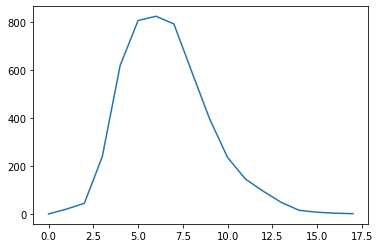

In [37]:
VOCAB3.wlen.value_counts().sort_index().plot();

Above is the distribution of word lengths in our corpus. The average word length is around 6.5.

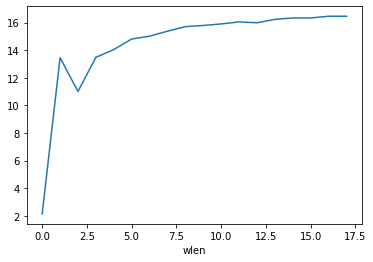

In [38]:
VOCAB3.groupby('wlen').i.mean().plot();

Average information of a word increases linearly as a function of its length.

In [39]:
H_vocab = round(VOCAB3.h.sum(), 2)
W_len = round(VOCAB3.wlen.mean(), 2)
R_vocab = round((1 - H_vocab / np.log2(VOCAB3.shape[0])) * 100, 2)
R_wlen = round((1 - W_len / np.log2(VOCAB3.shape[0])) * 100, 2)
HX_vocab = round(U_vocab * VOCAB3.i.sum(), 2)

In [40]:
print(f'N    = {N_vocab}', 
      f'H    = {H_vocab}',
      f'R    = {R_vocab}%',       
      f'µL   = {W_len}', 
      f'RµL  = {R_wlen}%', 
      f'HX   = {HX_vocab}', sep='\n')

N    = 4892
H    = 7.57
R    = 38.24%
µL   = 6.61
RµL  = 46.07%
HX   = 15.06


Above are the various statistics like the entropy, word length, redundancy, etc.

### Zipf's Law

Compute term_rank

In [41]:
VOCAB4 = VOCAB3.sort_values('n', ascending=False)
VOCAB4['term_rank'] = [r+1 for r in range(VOCAB4.shape[0])]
VOCAB4 = VOCAB4.sort_values('n', ascending=False)
VOCAB4['term_rank'] = [r+1 for r in range(VOCAB4.shape[0])]

In [42]:
VOCAB4

term_id      n  num  stop stem_porter stem_snowball  \
term_str                                                          
                  0  20514    0     0                             
the            4315   4482    0     1         the           the   
i              2149   2332    0     1           i             i   
and             126   2285    0     1         and           and   
to             4385   1545    0     1          to            to   
...             ...    ...  ...   ...         ...           ...   
specialist     3978      1    0     0  specialist    specialist   
bastard         338      1    0     0     bastard       bastard   
source         3964      1    0     0       sourc         sourc   
applauding      166      1    0     0     applaud       applaud   
letting        2446      1    0     0         let           let   

           stem_lancaster pos_max     dpidp     dfidf    df       idf  \
term_str                                                                
                              NaN       NaN       NaN   NaN       NaN   
the                   the      DT  0.000000  0.000000  19.0  0.000000   
i                       i     PRP  0.000000  0.000000  19.0  0.000000   
and                   and      CC  0.000000  0.000000  19.0  0.000000   
to                     to      TO  0.000000  0.000000  19.0  0.000000   
...                   ...     ...       ...       ...   ...       ...   
specialist           spec      NN  0.223575  4.247928   1.0  4.247928   
bastard           bastard      NN  0.223575  4.247928   1.0  4.247928   
source              sourc      NN  0.223575  4.247928   1.0  4.247928   
applauding        applaud     VBG  0.223575  4.247928   1.0  4.247928   
letting               let     VBG  0.223575  4.247928   1.0  4.247928   

            tfidf_sum_chap_max         p             s          i         h  \
term_str                                                                      
                           NaN  0.227367      4.398167   2.136902  0.485862   
the                   0.000000  0.049676     20.130299   4.331297  0.215163   
i                     0.000000  0.025847     38.689537   5.273872  0.136313   
and                   0.000000  0.025326     39.485339   5.303245  0.134309   
to                    0.000000  0.017124     58.397411   5.867833  0.100481   
...                        ...       ...           ...        ...       ...   
specialist            0.015503  0.000011  90224.000000  16.461224  0.000182   
bastard               0.014207  0.000011  90224.000000  16.461224  0.000182   
source                0.009038  0.000011  90224.000000  16.461224  0.000182   
applauding            0.008061  0.000011  90224.000000  16.461224  0.000182   
letting               0.008061  0.000011  90224.000000  16.461224  0.000182   

            wlen  term_rank  
term_str                     
               0          1  
the            3          2  
i              1          3  
and            3          4  
to             2          5  
...          ...        ...  
specialist    10       4888  
bastard        7       4889  
source         6       4890  
applauding    10       4891  
letting        7       4892  

[4892 rows x 19 columns]

In [43]:

VOCAB4.sort_values('dpidp', ascending=False).head(20)[['n', 'pos_max', 'dpidp', 'dfidf']].style.background_gradient()

In [125]:
px.scatter(VOCAB4, 'tfidf_sum_chap_max', 'dpidp', color='pos_max', height=800, hover_name=VOCAB4.index)

In [126]:
px.scatter(VOCAB4, 'tfidf_sum_chap_max', 'dpidp', color='pos_max', height=800, hover_name=VOCAB_FROM_NLTK.index)

In [127]:
px.scatter(VOCAB4, 'i', 'dpidp', color='pos_max', hover_name=VOCAB_FROM_NLTK.index, log_x=True)

### Zipf's K

In [47]:
VOCAB4['zipf_k'] = VOCAB4.n * VOCAB4.term_rank
ZK = round(VOCAB4.zipf_k.mean(), 2)
ZK

5090.76

In [48]:
VOCAB4['zipf_y'] = ZK / VOCAB4.term_rank

In [128]:
px.scatter(VOCAB4, 'term_rank', 'zipf_y', log_x=True)

We can see that as rank increases, the predictive frequency of the word decreases

In [129]:
px.scatter(VOCAB4, 'term_rank', 'zipf_y', log_x=True, log_y=True)

As the ideal zipf's law manifests, we can see here, as rank increases, the predictive frequency of the word decreases

### TFIDF

In [51]:
CHAPS = pd.read_csv(f"../data/output/chaps.csv", index_col=0)

In [52]:
CHAPS.head()

chap_str
chap_num                                                   
1         Robert Cohn was once middleweight boxing champ...
2         That winter Robert Cohn went over to America w...
3         It was a warm spring night and I sat at a tabl...
4         The taxi went up the hill, passed the lighted ...
5         In the morning I walked down the Boulevard to ...

In [53]:
para_pat = r'\n\n+'
PARAS = CHAPS['chap_str'].str.split(para_pat, expand=True).stack()\
    .to_frame('para_str').sort_index()
PARAS.index.names = OHCO[:2]
PARAS['para_str'] = PARAS['para_str'].str.replace(r'\n', ' ', regex=True)
PARAS['para_str'] = PARAS['para_str'].str.strip()
PARAS = PARAS[~PARAS['para_str'].str.match(r'^\s*$')]

In [54]:
PARAS.head()

para_str
chap_num para_num                                                   
1        0         Robert Cohn was once middleweight boxing champ...
         1         I mistrust all frank and simple people, especi...
         2         Robert Cohn was a member, through his father, ...
         3         The divorce was arranged and Robert Cohn went ...
         4         By that time, though, he had other things to w...

In [55]:
sample_para = PARAS.iloc[1].para_str

In [56]:
sample_para

'I mistrust all frank and simple people, especially when their stories hold together, and I always had a suspicion that perhaps Robert Cohn had never been middleweight boxing champion, and that perhaps a horse had stepped on his face, or that maybe his mother had been frightened or seen something, or that he had, maybe, bumped into something as a young child, but I finally had somebody verify the story from Spider Kelly. Spider Kelly not only remembered Cohn. He had often wondered what had become of him.'

In [57]:
SENTS = PARAS.para_str.apply(lambda x: pd.Series(nltk.sent_tokenize(x)))\
        .stack()\
        .to_frame('sent_str')
SENTS.index.names = OHCO[:3]

In [58]:
SENTS

sent_str
chap_num para_num sent_num                                                   
1        0        0         Robert Cohn was once middleweight boxing champ...
                  1         Do not think that I am very much impressed by ...
                  2         He cared nothing for boxing, in fact he dislik...
                  3         There was a certain inner comfort in knowing h...
                  4                         He was Spider Kelly’s star pupil.
...                                                                       ...
19       263      1                                      He raised his baton.
                  2         The car slowed suddenly pressing Brett against...
         264      0                                            “Yes,” I said.
                  1                            “Isn’t it pretty to think so?”
         265      0                                                   THE END

[7798 rows x 1 columns]

In [59]:
sample_sent = SENTS.iloc[3].sent_str

In [60]:
sample_sent

'There was a certain inner comfort in knowing he could knock down anybody who was snooty to him, although, being very shy and a thoroughly nice boy, he never fought except in the gym.'

In [61]:
sample_tokens = nltk.word_tokenize(sample_sent)

In [62]:
print(sample_tokens)

['There', 'was', 'a', 'certain', 'inner', 'comfort', 'in', 'knowing', 'he', 'could', 'knock', 'down', 'anybody', 'who', 'was', 'snooty', 'to', 'him', ',', 'although', ',', 'being', 'very', 'shy', 'and', 'a', 'thoroughly', 'nice', 'boy', ',', 'he', 'never', 'fought', 'except', 'in', 'the', 'gym', '.']


In [63]:
keep_whitespace = True

In [64]:
if keep_whitespace:
    TOKENS = SENTS.sent_str\
            .apply(lambda x: pd.Series(nltk.pos_tag(nltk.word_tokenize(x))))\
            .stack()\
            .to_frame('pos_tuple')
else:
    TOKENS = SENTS.sent_str\
            .apply(lambda x: pd.Series(nltk.pos_tag(nltk.WhitespaceTokenizer().tokenize(x))))\
            .stack()\
            .to_frame('pos_tuple')

In [65]:
TOKENS.index.names = OHCO

In [66]:
TOKENS

pos_tuple
chap_num para_num sent_num token_num                    
1        0        0        0               (Robert, NNP)
                           1                 (Cohn, NNP)
                           2                  (was, VBD)
                           3                  (once, RB)
                           4          (middleweight, JJ)
...                                                  ...
19       264      1        8                    (so, RB)
                           9                      (?, .)
                           10                    (”, NN)
         265      0        0                   (THE, DT)
                           1                   (END, NN)

[90224 rows x 1 columns]

In [67]:
TOKENS['pos'] = TOKENS.pos_tuple.apply(lambda x: x[1])
TOKENS['token_str'] = TOKENS.pos_tuple.apply(lambda x: x[0])
TOKENS['term_str'] = TOKENS.token_str.str.lower()

In [68]:
TOKENS.head()

pos_tuple  pos     token_str  \
chap_num para_num sent_num token_num                                          
1        0        0        0               (Robert, NNP)  NNP        Robert   
                           1                 (Cohn, NNP)  NNP          Cohn   
                           2                  (was, VBD)  VBD           was   
                           3                  (once, RB)   RB          once   
                           4          (middleweight, JJ)   JJ  middleweight   

                                          term_str  
chap_num para_num sent_num token_num                
1        0        0        0                robert  
                           1                  cohn  
                           2                   was  
                           3                  once  
                           4          middleweight

In [69]:
VOCAB = TOKENS.term_str.value_counts().to_frame('n')
VOCAB.index.name = 'term_str'
VOCAB['p'] = VOCAB.n / VOCAB.n.sum()
VOCAB['i'] = -np.log2(VOCAB.p)
VOCAB['n_chars'] = VOCAB.index.str.len()

In [70]:
TOKENS.head()

pos_tuple  pos     token_str  \
chap_num para_num sent_num token_num                                          
1        0        0        0               (Robert, NNP)  NNP        Robert   
                           1                 (Cohn, NNP)  NNP          Cohn   
                           2                  (was, VBD)  VBD           was   
                           3                  (once, RB)   RB          once   
                           4          (middleweight, JJ)   JJ  middleweight   

                                          term_str  
chap_num para_num sent_num token_num                
1        0        0        0                robert  
                           1                  cohn  
                           2                   was  
                           3                  once  
                           4          middleweight

In [71]:
VOCAB['max_pos'] = TOKENS[['term_str','pos']].value_counts().unstack(fill_value=0).idxmax(1)

In [72]:
tags_csv = [(line.split()[0], ' '.join(line.split()[1:])) 
            for line in open(f'../data/upenn_tagset.txt', 'r').readlines()]

In [73]:
TOKENS.head()

pos_tuple  pos     token_str  \
chap_num para_num sent_num token_num                                          
1        0        0        0               (Robert, NNP)  NNP        Robert   
                           1                 (Cohn, NNP)  NNP          Cohn   
                           2                  (was, VBD)  VBD           was   
                           3                  (once, RB)   RB          once   
                           4          (middleweight, JJ)   JJ  middleweight   

                                          term_str  
chap_num para_num sent_num token_num                
1        0        0        0                robert  
                           1                  cohn  
                           2                   was  
                           3                  once  
                           4          middleweight

In [74]:
POS = pd.DataFrame(tags_csv)
POS.columns = ['pos_code','pos_def']
POS = POS.set_index('pos_code')
POS['n'] = TOKENS.pos.value_counts()
POS['n'] = POS['n'].fillna(0).astype('int')
POS['group'] = POS.apply(lambda x: x.name[:2], 1)
POS['punc'] = POS.apply(lambda x: bool(re.match(r"^\W", x.name)), 1)

In [75]:
POS[POS.punc].index.to_list()

['$', "''", '(', ')', ',', '--', '.', ':', '``']

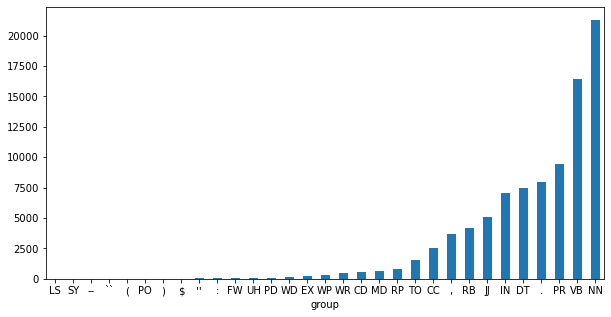

In [76]:
POS.groupby('group').n.sum().sort_values().plot.bar(figsize=(10,5), rot=0);

In [77]:
sw = pd.DataFrame({'stop': 1}, index=nltk.corpus.stopwords.words('english'))
sw.index.name='term_str'

In [78]:
if 'stop' not in VOCAB.columns:
    VOCAB = VOCAB.join(sw)
    VOCAB['stop'] = VOCAB['stop'].fillna(0).astype('int')

In [79]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
VOCAB['p_stem'] = VOCAB.apply(lambda x: stemmer.stem(x.name), 1)

In [80]:
VOCAB.p_stem.value_counts().head(10)

care          6
bull-fight    5
announc       5
enjoy         5
wonder        5
close         5
race          4
notic         4
rock          4
tast          4
Name: p_stem, dtype: int64

In [81]:
temp = TOKEN_NLTK_ANNOTATED.copy()

In [82]:
perf_tokens = TOKENS.copy()

In [83]:
csv_file = f"../data/output/nltk_tokens.csv"
TOKENS.to_csv(csv_file)

In [84]:
csv_file = f"../data/output/nltk_tokens_FINAL.csv"
TOKENS.to_csv(csv_file)

In [85]:
TOKEN_NLTK_ANNOTATED = TOKENS.copy()

In [86]:
TOKEN_NLTK_ANNOTATED.head()

pos_tuple  pos     token_str  \
chap_num para_num sent_num token_num                                          
1        0        0        0               (Robert, NNP)  NNP        Robert   
                           1                 (Cohn, NNP)  NNP          Cohn   
                           2                  (was, VBD)  VBD           was   
                           3                  (once, RB)   RB          once   
                           4          (middleweight, JJ)   JJ  middleweight   

                                          term_str  
chap_num para_num sent_num token_num                
1        0        0        0                robert  
                           1                  cohn  
                           2                   was  
                           3                  once  
                           4          middleweight

In [87]:
DOC = OHCO[:2]

In [88]:
BOW = TOKEN_NLTK_ANNOTATED.groupby(DOC+['term_str']).term_str.count().to_frame('tf_n')
BOW.sample(10)

tf_n
chap_num para_num term_str      
18       181      ,            1
17       23       me           1
5        0        brioche      1
8        110      .            2
12       161      business     1
13       56       ,            1
15       222      not          1
11       29       denver       1
7        186      ,            1
18       116      nor          1

### Compute tf variants

In [89]:
D = BOW.groupby(DOC).tf_n  
BOW['tf_jp'] = D.apply(lambda x: x / x.sum().sum())
BOW['tf_cp'] = D.apply(lambda x: x / x.sum())
BOW['tf_l2'] = D.apply(lambda x: x / np.sqrt((x**2).sum()))
BOW['tf_logn'] = D.apply(lambda x: np.log2(1 + x))
BOW['tf_sub'] = D.apply(lambda x: 1 + np.log2(x))
BOW['tf_max'] = D.apply(lambda x: .4 + .6 * (x / x.max()))
BOW['tf_bool'] = D.apply(lambda x: x.astype('bool') / x.astype('bool').sum())

In [90]:
tf_types = [col.split('_')[1] for col in BOW.columns.to_list() if 'tf_' in col]

In [91]:
BOW.head()

tf_n     tf_jp     tf_cp    tf_l2   tf_logn  \
chap_num para_num term_str                                                
1        0        ,            9  0.036735  0.036735  0.29277  3.321928   
                  .           13  0.053061  0.053061  0.42289  3.807355   
                  a            6  0.024490  0.024490  0.19518  2.807355   
                  all          1  0.004082  0.004082  0.03253  1.000000   
                  although     1  0.004082  0.004082  0.03253  1.000000   

                              tf_sub    tf_max   tf_bool  
chap_num para_num term_str                                
1        0        ,         4.169925  0.815385  0.007519  
                  .         4.700440  1.000000  0.007519  
                  a         3.584963  0.676923  0.007519  
                  all       1.000000  0.446154  0.007519  
                  although  1.000000  0.446154  0.007519

### Document Frequency

In [92]:
VOCAB4['df'] = BOW.groupby('term_str').tf_n.count()
N_docs = len(D.groups)
VOCAB4['idf'] = np.log2(N_docs/VOCAB4.df)

In [93]:
VOCAB4

term_id      n  num  stop stem_porter stem_snowball  \
term_str                                                          
                  0  20514    0     0                             
the            4315   4482    0     1         the           the   
i              2149   2332    0     1           i             i   
and             126   2285    0     1         and           and   
to             4385   1545    0     1          to            to   
...             ...    ...  ...   ...         ...           ...   
specialist     3978      1    0     0  specialist    specialist   
bastard         338      1    0     0     bastard       bastard   
source         3964      1    0     0       sourc         sourc   
applauding      166      1    0     0     applaud       applaud   
letting        2446      1    0     0         let           let   

           stem_lancaster pos_max     dpidp     dfidf  ...        idf  \
term_str                                               ...              
                              NaN       NaN       NaN  ...        NaN   
the                   the      DT  0.000000  0.000000  ...   1.495924   
i                       i     PRP  0.000000  0.000000  ...   1.326550   
and                   and      CC  0.000000  0.000000  ...   2.077173   
to                     to      TO  0.000000  0.000000  ...   1.843171   
...                   ...     ...       ...       ...  ...        ...   
specialist           spec      NN  0.223575  4.247928  ...  11.680799   
bastard           bastard      NN  0.223575  4.247928  ...  11.680799   
source              sourc      NN  0.223575  4.247928  ...  11.680799   
applauding        applaud     VBG  0.223575  4.247928  ...  11.680799   
letting               let     VBG  0.223575  4.247928  ...  11.680799   

            tfidf_sum_chap_max         p             s          i         h  \
term_str                                                                      
                           NaN  0.227367      4.398167   2.136902  0.485862   
the                   0.000000  0.049676     20.130299   4.331297  0.215163   
i                     0.000000  0.025847     38.689537   5.273872  0.136313   
and                   0.000000  0.025326     39.485339   5.303245  0.134309   
to                    0.000000  0.017124     58.397411   5.867833  0.100481   
...                        ...       ...           ...        ...       ...   
specialist            0.015503  0.000011  90224.000000  16.461224  0.000182   
bastard               0.014207  0.000011  90224.000000  16.461224  0.000182   
source                0.009038  0.000011  90224.000000  16.461224  0.000182   
applauding            0.008061  0.000011  90224.000000  16.461224  0.000182   
letting               0.008061  0.000011  90224.000000  16.461224  0.000182   

            wlen  term_rank  zipf_k       zipf_y  
term_str                                          
               0          1   20514  5090.760000  
the            3          2    8964  2545.380000  
i              1          3    6996  1696.920000  
and            3          4    9140  1272.690000  
to             2          5    7725  1018.152000  
...          ...        ...     ...          ...  
specialist    10       4888    4888     1.041481  
bastard        7       4889    4889     1.041268  
source         6       4890    4890     1.041055  
applauding    10       4891    4891     1.040842  
letting        7       4892    4892     1.040630  

[4892 rows x 21 columns]

### Compute BOW TFIDF

In [94]:
for tf_type in tf_types:
    BOW[f'tfidf_{tf_type}'] = BOW[f'tf_{tf_type}'] * VOCAB4.idf

In [95]:
BOW.head()

tf_n     tf_jp     tf_cp    tf_l2   tf_logn  \
chap_num para_num term_str                                                
1        0        ,            9  0.036735  0.036735  0.29277  3.321928   
                  .           13  0.053061  0.053061  0.42289  3.807355   
                  a            6  0.024490  0.024490  0.19518  2.807355   
                  all          1  0.004082  0.004082  0.03253  1.000000   
                  although     1  0.004082  0.004082  0.03253  1.000000   

                              tf_sub    tf_max   tf_bool    tfidf_n  tfidf_jp  \
chap_num para_num term_str                                                      
1        0        ,         4.169925  0.815385  0.007519        NaN       NaN   
                  .         4.700440  1.000000  0.007519        NaN       NaN   
                  a         3.584963  0.676923  0.007519  11.416331  0.046597   
                  all       1.000000  0.446154  0.007519   3.275658  0.013370   
                  although  1.000000  0.446154  0.007519   9.358871  0.038199   

                            tfidf_cp  tfidf_l2  tfidf_logn  tfidf_sub  \
chap_num para_num term_str                                              
1        0        ,              NaN       NaN         NaN        NaN   
                  .              NaN       NaN         NaN        NaN   
                  a         0.046597  0.371373    5.341616   6.821187   
                  all       0.013370  0.106557    3.275658   3.275658   
                  although  0.038199  0.304444    9.358871   9.358871   

                            tfidf_max  tfidf_bool  
chap_num para_num term_str                         
1        0        ,               NaN         NaN  
                  .               NaN         NaN  
                  a          1.287996    0.014306  
                  all        1.461447    0.024629  
                  although   4.175496    0.070367

In [96]:
csv_file = f"../data/output/bow.csv"
BOW.to_csv(csv_file)

COMPUTE VOCAB TFIDF_SUM

In [97]:
for tf_type in tf_types:
    col = f"tfidf_{tf_type}"
    VOCAB4[col + "_sum"] = BOW.groupby('term_str')[col].sum()
    VOCAB4[col + "_sum"] = (VOCAB4[col + "_sum"] - VOCAB4[col + "_sum"].mean()) / VOCAB4[col + "_sum"].std()
    VOCAB4[col + "_sum"] = VOCAB4[col + "_sum"] - VOCAB4[col + "_sum"].min() 
    VOCAB4[col + "_sum"] = VOCAB4[col + "_sum"] / N_docs

In [98]:
tfidf_sum_cols = [f"tfidf_{type}_sum" for type in tf_types]

### Visualizing work above

In [99]:
rank_index = [i for i in range(1, 10)]\
    + [i for i in range(10, 100, 10)]\
    + [i for i in range(100, 1000, 100)]\
    + [i for i in range(1000,10000,1000)]
DEMO = VOCAB4.loc[VOCAB4.term_rank.isin(rank_index), ['term_rank', 'p', 'zipf_k', 'pos_max', 'wlen']]

In [100]:
sort_col = 'n'
VOCAB4.loc[DEMO.index, ['pos_max', 'n', 'df', 'term_rank']+tfidf_sum_cols]\
    .sort_values(sort_col, ascending=False)\
    .head(30).style.background_gradient(cmap='GnBu', high=.5)

In [101]:
fig_args = dict(
    color='pos_max',
    hover_name='term_str',
    hover_data=['n','df'],
    log_x = True,
    height=600
)
V = VOCAB4.reset_index()

In [130]:
px.scatter(V, 'term_rank', 'tfidf_n_sum', **fig_args)

In [131]:
px.scatter(V, 'term_rank', 'tfidf_cp_sum', **fig_args)

GROUP 2

In [104]:
px.scatter(V, 'term_rank', 'tfidf_sub_sum', **fig_args)

In [105]:
px.scatter(V, 'term_rank', 'tfidf_logn_sum', **fig_args)

GROUP 3

In [106]:
px.scatter(V, 'term_rank', 'tfidf_bool_sum', **fig_args)

In [107]:
px.scatter(V, 'term_rank', 'tfidf_max_sum', **fig_args)

### Comparing Top Terms

In [108]:
data = []
for i in tf_types:
    col = f"tfidf_{i}_sum"
    topx = VOCAB4[VOCAB4.stop==0].sort_values(col, ascending=False).head(10).index.to_list()
    data.append((col, topx))

In [109]:
TOPTERMS = pd.DataFrame(data, columns=['type','terms']).set_index('type').terms.apply(pd.Series)

In [110]:
TOPTERMS.T

type tfidf_n_sum tfidf_jp_sum tfidf_cp_sum tfidf_l2_sum tfidf_logn_sum  \
0           said         said         said         said           said   
1          brett        brett        brett        brett          brett   
2           bill         bill         bill         bill           bill   
3           went          yes          yes         mike           went   
4            one           go           go           go            one   
5           mike         mike         mike          yes           mike   
6           cohn         good         good         know             go   
7             go        asked        asked        asked           cohn   
8           like         know         know         good           like   
9           good         come         come         like           good   

type tfidf_sub_sum tfidf_max_sum tfidf_bool_sum  
0             said          said           said  
1            brett         brett          brett  
2             bill          bill           bill  
3             went          mike            yes  
4              one            go           mike  
5             mike          like             go  
6               go          cohn           good  
7             cohn         asked           know  
8             like          know          asked  
9             good          good           come

### Keep Significant Terms

In [111]:
sum_method = 'tfidf_sub_sum'

In [112]:
cut_off = VOCAB4[sum_method].quantile(.9)

In [113]:
cut_off

0.00019798637347310296

In [114]:
SIGS = (VOCAB4[sum_method] >= cut_off) & (VOCAB4.stop == 0) #also eliminating stop words

In [115]:
VOCAB_SHORT = VOCAB4.loc[SIGS, ['pos_max','n', 'df', sum_method]].sort_values(sum_method, ascending=False)

In [116]:
VOCAB_SHORT.shape[0]

335

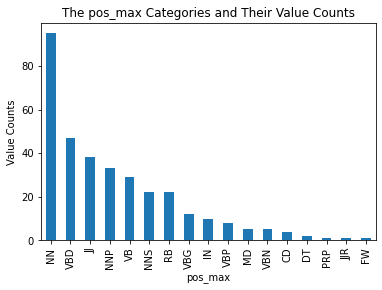

In [117]:
VOCAB_SHORT.value_counts('pos_max').plot.bar();
plt.title('The pos_max Categories and Their Value Counts')
plt.xlabel('pos_max')
plt.ylabel('Value Counts')
plt.show()

We can see that the pos_max categories NN and VBD are amongst the highest in count.

In [118]:
VOCAB_SHORT.head(20).style.background_gradient(cmap='GnBu')


### More Stats

In [119]:
V2 = VOCAB4[tfidf_sum_cols]
VSTATS = V2.describe().T

In [120]:
VSTATS.sort_values('max').style.background_gradient(cmap='GnBu')

<AxesSubplot:>

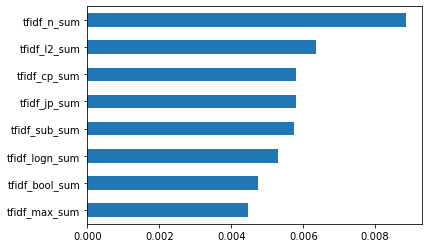

In [121]:
VSTATS['max'].sort_values().plot.barh()

In [122]:
VSTATS

count      mean       std  min       25%       50%       75%  \
tfidf_n_sum     4543.0  0.000081  0.000305  0.0  0.000000  0.000013  0.000047   
tfidf_jp_sum    4543.0  0.000091  0.000305  0.0  0.000004  0.000016  0.000057   
tfidf_cp_sum    4543.0  0.000091  0.000305  0.0  0.000004  0.000016  0.000057   
tfidf_l2_sum    4543.0  0.000092  0.000305  0.0  0.000006  0.000020  0.000057   
tfidf_logn_sum  4543.0  0.000094  0.000305  0.0  0.000000  0.000017  0.000060   
tfidf_sub_sum   4543.0  0.000091  0.000305  0.0  0.000000  0.000015  0.000055   
tfidf_max_sum   4543.0  0.000098  0.000305  0.0  0.000002  0.000016  0.000060   
tfidf_bool_sum  4543.0  0.000098  0.000305  0.0  0.000005  0.000019  0.000065   

                     max  
tfidf_n_sum     0.008865  
tfidf_jp_sum    0.005790  
tfidf_cp_sum    0.005790  
tfidf_l2_sum    0.006366  
tfidf_logn_sum  0.005309  
tfidf_sub_sum   0.005737  
tfidf_max_sum   0.004470  
tfidf_bool_sum  0.004752

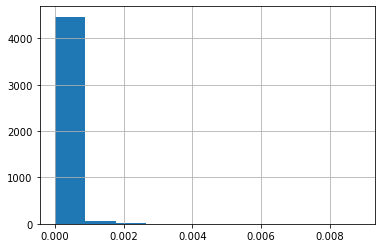

In [123]:
V2.tfidf_n_sum.hist();

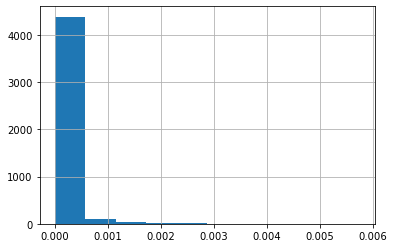

In [124]:
V2.tfidf_sub_sum.hist();